# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Paillasse d'expérimentation
---

## Sujet : Application de prédicteurs à l'ensemble du corpus

---


## Initialisation de la paillasse 
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

## Observations et environnement
---

### Chargement du corpus

In [3]:
corpus_filename = '221001-CorpusNews.csv'

In [4]:
df_corpus = pd.read_csv(f'data/corpus/{corpus_filename}')

/var/folders/n0/92k02lss71s67fxfyc0qn84m0000gn/T/ipykernel_16847/533564688.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corpus = pd.read_csv(f'data/corpus/{corpus_filename}')


In [5]:
df_corpus

,url,title,article,tag,abstract,author,date,date_iso,site,text
0,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...","[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",NaN,NaN,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,Adhésion à la Russie : 93% pour le « oui » dan...
1,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",NaN,NaN,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,"Tous les jeunes, portez la nouvelle (russe)\np..."
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"['Mot-clés : censure, jacinda ardern, ONU', 'P...",NaN,NaN,29 septembre 2022,2022-09-29T00:00:00,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",[],NaN,Auteur(s)\nFranceSoir,Publié le 28 septembre 2022 - 13:15,2022-09-28T13:15:00,www.francesoir.fr,Compostage humain: les “funérailles vertes” ga...
4,https://www.lesalonbeige.fr/anges-et-demons-vi...,Anges et Démons – VII – saint Michel archange,NaN,[],NaN,Par Michel Janva,27 septembre 2022,2022-09-27T00:00:00,www.lesalonbeige.fr,Anges et Démons – VII – saint Michel archange\n
...,...,...,...,...,...,...,...,...,...,...
89114,https://lesmoutonsrebelles.com/presidentielles...,Présidentielles américaines: «Une incroyable b...,"Dans la circonscription du comté de Floyd, dan...",[],NaN,NaN,NaN,NaN,lesmoutonsrebelles.com,Présidentielles américaines: «Une incroyable b...
89115,https://www.francetvinfo.fr/elections/presiden...,"DIRECT. Election présidentielle : Pécresse, Mé...",NaN,[],NaN,NaN,NaN,NaN,www.francetvinfo.fr,"DIRECT. Election présidentielle : Pécresse, Mé..."
89116,https://lesmoutonsrebelles.com/nous-aurions-du...,« Nous aurions dû écouter en 1992 cet homme qu...,J’avais 17 ans et je m’en souviens comme si c’...,[],NaN,NaN,NaN,NaN,lesmoutonsrebelles.com,« Nous aurions dû écouter en 1992 cet homme qu...
89117,https://lesmoutonsrebelles.com/sorti-ce-matin-...,"Sorti ce matin de prison, l’homme qui a giflé ...",Condamné à trois mois de prison ferme pour avo...,[],NaN,NaN,NaN,NaN,lesmoutonsrebelles.com,"Sorti ce matin de prison, l’homme qui a giflé ..."


In [6]:
df_corpus[df_corpus['text'].isna()]

,url,title,article,tag,abstract,author,date,date_iso,site,text


### Chargement prédicteur

In [7]:
import pickle

pred_filename = 'data/predictors/220930-cv_lr.pp'
with open(pred_filename,'rb') as file:
    predictor = pickle.load(file) 

predictor

{'descriptor': CountVectorizer(stop_words=['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un',
                             'du', 'est', 'une', 'que', 'pour', 'dans', 'qui',
                             'il', 'par', 'sur', 'au', 'pas', 'plus', 'ce', 'ne',
                             'qu', 'se', 'ont', 'avec', 'sont', 'ou', 'son', ...]),
 'classifier': LogisticRegression(max_iter=1000),
 'data': ''}

## Expérience
---

### Prédictions sur le corpus

In [8]:
#df_predict = df_corpus[['url','title','text']].sample(50)
#df_predict = df_corpus[['url','title','text']]
df_predict = df_corpus

In [9]:
%%time
X = predictor['descriptor'].transform(df_predict['text'])

CPU times: user 15.6 s, sys: 118 ms, total: 15.7 s
Wall time: 15.7 s


In [10]:
%%time
df_predict['y'] = predictor['classifier'].predict(X)
df_predict.loc[:,'y_proba'] = predictor['classifier'].predict_proba(X)[:,1]


df_predict

CPU times: user 37 ms, sys: 26.6 ms, total: 63.6 ms
Wall time: 63.4 ms


,url,title,article,tag,abstract,author,date,date_iso,site,text,y,y_proba
0,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...","[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",NaN,NaN,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,Adhésion à la Russie : 93% pour le « oui » dan...,0.0,0.012630
1,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",NaN,NaN,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,"Tous les jeunes, portez la nouvelle (russe)\np...",0.0,0.002944
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"['Mot-clés : censure, jacinda ardern, ONU', 'P...",NaN,NaN,29 septembre 2022,2022-09-29T00:00:00,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,1.0,0.963768
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",[],NaN,Auteur(s)\nFranceSoir,Publié le 28 septembre 2022 - 13:15,2022-09-28T13:15:00,www.francesoir.fr,Compostage humain: les “funérailles vertes” ga...,0.0,0.007914
4,https://www.lesalonbeige.fr/anges-et-demons-vi...,Anges et Démons – VII – saint Michel archange,NaN,[],NaN,Par Michel Janva,27 septembre 2022,2022-09-27T00:00:00,www.lesalonbeige.fr,Anges et Démons – VII – saint Michel archange\n,0.0,0.321005
...,...,...,...,...,...,...,...,...,...,...,...,...
89114,https://lesmoutonsrebelles.com/presidentielles...,Présidentielles américaines: «Une incroyable b...,"Dans la circonscription du comté de Floyd, dan...",[],NaN,NaN,NaN,NaN,lesmoutonsrebelles.com,Présidentielles américaines: «Une incroyable b...,0.0,0.464477
89115,https://www.francetvinfo.fr/elections/presiden...,"DIRECT. Election présidentielle : Pécresse, Mé...",NaN,[],NaN,NaN,NaN,NaN,www.francetvinfo.fr,"DIRECT. Election présidentielle : Pécresse, Mé...",0.0,0.314112
89116,https://lesmoutonsrebelles.com/nous-aurions-du...,« Nous aurions dû écouter en 1992 cet homme qu...,J’avais 17 ans et je m’en souviens comme si c’...,[],NaN,NaN,NaN,NaN,lesmoutonsrebelles.com,« Nous aurions dû écouter en 1992 cet homme qu...,0.0,0.222426
89117,https://lesmoutonsrebelles.com/sorti-ce-matin-...,"Sorti ce matin de prison, l’homme qui a giflé ...",Condamné à trois mois de prison ferme pour avo...,[],NaN,NaN,NaN,NaN,lesmoutonsrebelles.com,"Sorti ce matin de prison, l’homme qui a giflé ...",0.0,0.055205


## Mesure et observation des résultats
---

In [ ]:
import numpy as np

In [11]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

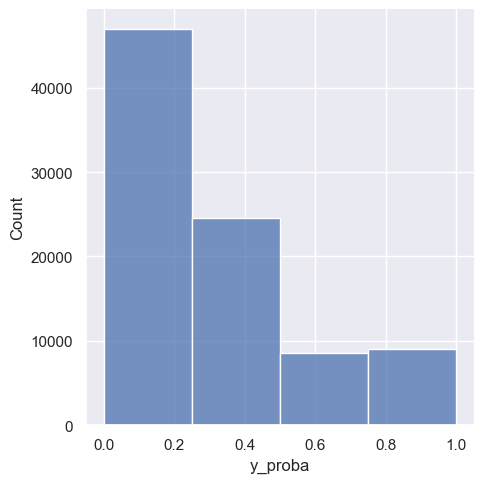

In [19]:
sns.displot(df_predict["y_proba"], binwidth=0.25)

In [37]:
def size(y):
    return 'S' if y<=0.25 else 'L' if y>=0.75 else 'M'

In [38]:
df_predict['y_bin']=df_predict['y_proba'].apply(size)

In [48]:
df_pivot_sites = pd.pivot_table(df_predict[['site','y_bin']],index='site',columns='y_bin',aggfunc=np.count_nonzero)

In [60]:
df_pivot_sites.fillna(0,inplace=True)

In [61]:
df_pivot_sites['total']=df_pivot_sites['S']+df_pivot_sites['M']+df_pivot_sites['L']

In [62]:
df_pivot_sites['S_freq']=df_pivot_sites['S']/df_pivot_sites['total']
df_pivot_sites['L_freq']=df_pivot_sites['L']/df_pivot_sites['total']

In [78]:
df_pivot_sites

y_bin,L,M,S,total,S_freq,L_freq
site,,,,,,
actu.fr,132.0,1428.0,4200.0,5760.0,0.729167,0.022917
fr.novopress.info,86.0,836.0,600.0,1522.0,0.394218,0.056505
fr.sott.net,1252.0,2702.0,1948.0,5902.0,0.330058,0.212131
infodujour.fr,128.0,248.0,636.0,1012.0,0.628458,0.126482
lemediaen442.fr,878.0,3590.0,850.0,5318.0,0.159835,0.165100
lesakerfrancophone.fr,932.0,440.0,384.0,1756.0,0.218679,0.530752
lesdeqodeurs.fr,102.0,36.0,38.0,176.0,0.215909,0.579545
lesmoutonsrebelles.com,590.0,2594.0,1536.0,4720.0,0.325424,0.125000
lesobservateurs.ch,114.0,438.0,376.0,928.0,0.405172,0.122845


In [83]:
sns.catplot(data=df_pivot_sites, x="S_freq", y="L_freq", hue="site")

/Users/fm/Desktop/Work/Patat/patat-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'L_freq'

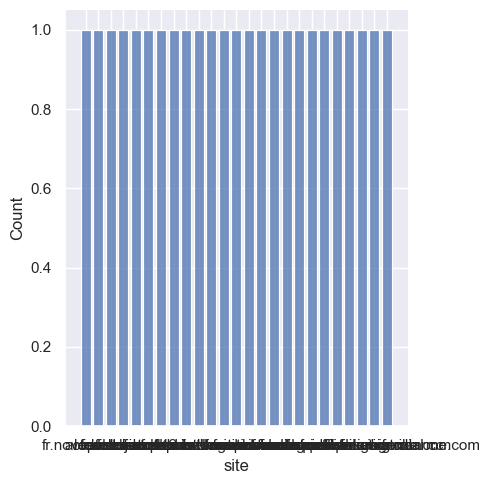

In [79]:
sns.displot(df_pivot_sites,x='site', shrink=.8)

In [63]:
df_pivot_sites.sort_values('L_freq',ascending=False)

y_bin,L,M,S,total,S_freq,L_freq
site,,,,,,
lesdeqodeurs.fr,102.0,36.0,38.0,176.0,0.215909,0.579545
lesakerfrancophone.fr,932.0,440.0,384.0,1756.0,0.218679,0.530752
lezarceleurs.blogspot.com,2342.0,1852.0,760.0,4954.0,0.153411,0.472749
reseauinternational.net,722.0,946.0,790.0,2458.0,0.321400,0.293735
www.nouvelordremondial.cc,48.0,72.0,74.0,194.0,0.381443,0.247423
fr.sott.net,1252.0,2702.0,1948.0,5902.0,0.330058,0.212131
www.polemia.com,266.0,380.0,614.0,1260.0,0.487302,0.211111
www.lelibrepenseur.org,1414.0,4450.0,1014.0,6878.0,0.147427,0.205583
www.wikistrike.com,1504.0,3488.0,3060.0,8052.0,0.380030,0.186786


In [64]:
df_pivot_sites.sort_values('S_freq')

y_bin,L,M,S,total,S_freq,L_freq
site,,,,,,
www.mondialisation.ca,0.0,38.0,0.0,38.0,0.000000,0.000000
www.lelibrepenseur.org,1414.0,4450.0,1014.0,6878.0,0.147427,0.205583
lezarceleurs.blogspot.com,2342.0,1852.0,760.0,4954.0,0.153411,0.472749
lemediaen442.fr,878.0,3590.0,850.0,5318.0,0.159835,0.165100
lesdeqodeurs.fr,102.0,36.0,38.0,176.0,0.215909,0.579545
lesakerfrancophone.fr,932.0,440.0,384.0,1756.0,0.218679,0.530752
www.lesalonbeige.fr,84.0,2258.0,1082.0,3424.0,0.316005,0.024533
reseauinternational.net,722.0,946.0,790.0,2458.0,0.321400,0.293735
lesmoutonsrebelles.com,590.0,2594.0,1536.0,4720.0,0.325424,0.125000


## Sauvegarde des résultats
---

In [57]:
predict_filename = '221001-CorpusNewsPredict.csv'
df_predict.to_csv(f'data/predictions/{predict_filename}',index=False)

## Conclusions
---

## Bricolages
---

In [36]:
df_predict['y_bin']

0        S
1        S
2        L
3        S
4        M
        ..
89114    M
89115    M
89116    S
89117    S
89118    S
Name: y_bin, Length: 89119, dtype: object